# Notebook for the obtention of anisotropy fields ($H_{k}$) from first harmonic measurements

The objective of this notebook is the treatment of harmonic measurements for the obtention of the anisotropy field. For that, we use the relationship between the angle by which the magnetic field is being applied (theta_H) and the one that feels the magnetisation (theta_M):

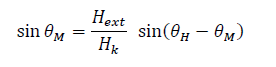

## Initial imports and definitions

We start importing the relevant modules:

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import glob
from pathlib import Path
import os
import pandas as pd
from scipy.optimize import curve_fit
import math
import seaborn as sns
%matplotlib inline

Pandas give slicing warnings, they can be deactivated as follows:

In [2]:
import warnings
warnings.filterwarnings('ignore')

We same the root working directory and place ourselves in the correct folder:

In [3]:
home_cwd = os.getcwd()

In [4]:
print(home_cwd)

C:\Users\apeco\OneDrive\Escritorio\PhD\Results\Dynacool\transfer_4037621_files_0478b8af


In [5]:
# work directory
home_std = Path(home_cwd, 'Second run - 6')

In [6]:
os.chdir(home_std)

In [7]:
print(os.getcwd())

C:\Users\apeco\OneDrive\Escritorio\PhD\Results\Dynacool\transfer_4037621_files_0478b8af\Second run - 6


We read all the file names and save the info in a "file_list" list:

In [8]:
file_list = glob.glob("*.dat")
file_list = [file.replace(".\\",'') for file in file_list]

The hall constants at all temperatures will be needed to substract the ordinary Hall effect (OHE) contribution, so we import the data as follows:

In [9]:
os.getcwd()

'C:\\Users\\apeco\\OneDrive\\Escritorio\\PhD\\Results\\Dynacool\\transfer_4037621_files_0478b8af\\Second run - 6'

In [10]:
df_correct = pd.read_csv('hall_fits_fromV1w.csv')
df_correct.head()

,T (K),I (A),Rh,err_Rh,offset,n,n_err
0,10.0,0.006,-1.034925e-11,1.809993e-13,0.000704,6.031079e+29,-1.054372e+28
1,20.0,0.006,-1.031812e-11,1.535030e-13,0.000716,6.049124e+29,-9.003479e+27
2,40.0,0.006,-1.049137e-11,1.396466e-13,0.000768,5.949200e+29,-7.924803e+27
3,60.0,0.006,-1.032525e-11,6.018876e-14,0.000836,6.044952e+29,-3.529001e+27
4,80.0,0.006,-9.351375e-12,2.123927e-13,0.000905,6.687388e+29,-1.561580e+28


The thickness will be needed for the calculation:

In [11]:
thickness = 4.5e-9

The data wil be fitted using a $A * cos(b + c) + b$ function, defined as follows:

In [12]:
def hyperb_cos(X, a, b, c): # cualquier función
    return [a*math.cos((x + c)/180*math.pi) + b for x in X]

## Read measurements files

We define a function which is able to read a file (giving its name) and giving as output the information that we desire:

In [13]:
# treatment function:
def read_file(file):
    # READ THE FILE, CREATE OUTPUT FOLDERS
    ###############################3
    string1 = file
    position1 = string1.index('_peak')
    position2 = string1.index('I_')
    current = string1[position2+2:position1-2]  # en A
    position3 = string1.index('_I')
    position4 = string1.index('H_')
    field = string1[position4+2:position3-1] # en G
    position5=string1.index('_K')
    position6=string1.index('T_')
    temperature= float(string1[position6+2:position5-1]) # en K
    # filter bad values
    docname = str(temperature) + 'K ' + str(current) + 'A'
    L = 0
    os.chdir(home_std)
    with open('{:}'.format(file), 'r') as csvfile:
            spamreader = csv.reader(csvfile, delimiter='\t')
            for row in spamreader:
                row2 = []
                for i in range(0,len(row)):
                    row2.append(float(row[i]))
                L += 1
    data = np.zeros((len(row),L))
    k = 0
    
    data = pd.read_csv(file, sep='\t', names=['angle', 'none', 'v1', 'v1e', 'v2', 'v2e'])
    """
    with open('{:}'.format(file), 'r') as csvfile:
            spamreader = csv.reader(csvfile, delimiter='\t')
            for row in spamreader:
                for i in range(0,len(row)):
                    data[i][k] = float(row[i])
                k += 1
    """
    try:
        os.mkdir(Path(home_std, docname))
    except Exception as e:
        pass
    os.chdir(Path(home_std, docname))
    ####################################
    
    os.chdir(home_std)

    return data

Same function but giving also information about the measurements:

In [14]:
def read_file_info(file):
    # READ THE FILE, OUTPUTS DATAFRAME AND DATA
    ###############################3
    string1 = file
    position1 = string1.index('_peak')
    position2 = string1.index('I_')
    current = float(string1[position2+2:position1-2])  # en A
    position3 = string1.index('_I')
    position4 = string1.index('H_')
    field = float(string1[position4+2:position3-1]) # en G
    position5=string1.index('_K')
    position6=string1.index('T_')
    temperature= float(string1[position6+2:position5-1]) # en K
    # filter bad values
    docname = str(temperature) + 'K ' + str(current) + 'A'
    L = 0
    os.chdir(home_std)
    with open('{:}'.format(file), 'r') as csvfile:
            spamreader = csv.reader(csvfile, delimiter='\t')
            for row in spamreader:
                row2 = []
                for i in range(0,len(row)):
                    row2.append(float(row[i]))
                L += 1
    data = np.zeros((len(row),L))
    k = 0
    
    data = pd.read_csv(file, sep='\t', names=['angle', 'none', 'v1', 'v1e', 'v2', 'v2e'])
    """
    with open('{:}'.format(file), 'r') as csvfile:
            spamreader = csv.reader(csvfile, delimiter='\t')
            for row in spamreader:
                for i in range(0,len(row)):
                    data[i][k] = float(row[i])
                k += 1
    """
    try:
        os.mkdir(Path(home_std, docname))
    except Exception as e:
        pass
    os.chdir(Path(home_std, docname))
    ####################################
    
    os.chdir(home_std)

    return data, (current, field, temperature)

Trial:

In [15]:
df_files = pd.DataFrame(file_list,columns=['file',])

In [16]:
df_files


,file
0,003_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
1,003_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
2,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
3,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
4,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
...,...
297,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
298,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
299,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...
300,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...


In [17]:
df_files['T'] = df_files['file'].apply(lambda x: float(x[x.find('T_')+2:x.find('_K_')]))
df_files['H'] = df_files['file'].apply(lambda x: float(x[x.find('H_')+2:x.find('G_')]))
df_files['I'] = df_files['file'].apply(lambda x: float(x[x.find('I_')+2:x.find('A_')]))

In [18]:
T = 40.0
I = 0.002
H = 70000

file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]

In [19]:
print(df_files['T'].unique())

[ 10.  20. 260. 300.  60.  80. 100. 120. 140. 180. 220.  40.]


In [20]:
file

'004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.002000A_peak_f_433.0Hz_T_40.0_K_1_2.dat'

10
20
40
60
80
120
140


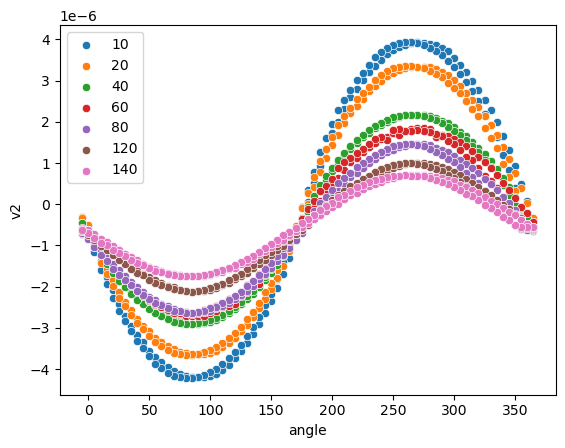

In [21]:
I = 0.010
H = 60000
T_list = [10, 20, 40, 60, 80, 120, 140]

for T in T_list:
    try:
        print(T)
        file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]
        data, info = read_file_info(file)
        sns.scatterplot(x='angle', y='v2', data=data, label=T)
    except:
        print(T)
        H+=1
        file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]
        data, info = read_file_info(file)
        sns.scatterplot(x='angle', y='v2', data=data, label=T)
        

180
220
260


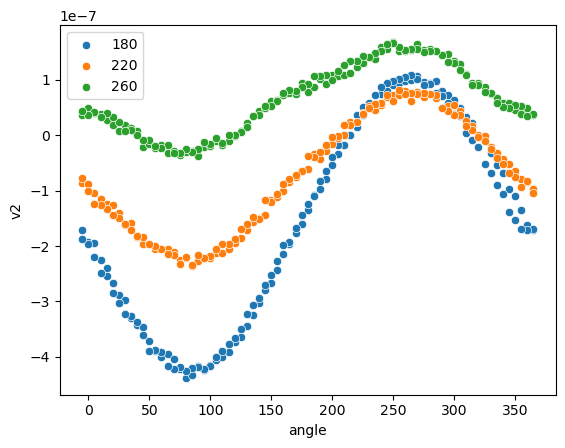

In [22]:
I = 0.006
H = 50000
T_list = [180, 220, 260]

for T in T_list:
    try:
        print(T)
        file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]
        data, info = read_file_info(file)
        sns.scatterplot(x='angle', y='v2', data=data, label=T)
    except:
        print(T)
        H+=1
        file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]
        data, info = read_file_info(file)
        sns.scatterplot(x='angle', y='v2', data=data, label=T)

180
220
260


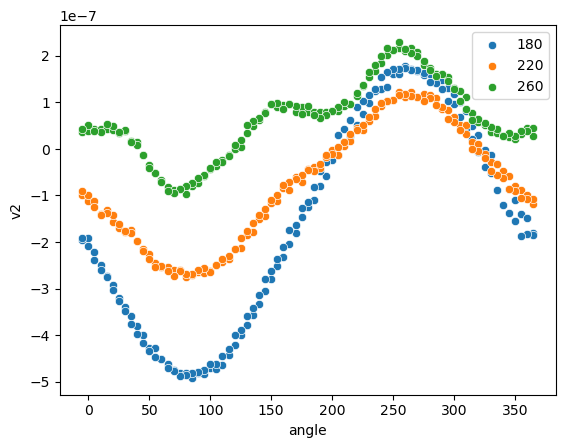

In [23]:
I = 0.006
H = 70000
T_list = [180, 220, 260]

for T in T_list:
    try:
        print(T)
        file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]
        data, info = read_file_info(file)
        sns.scatterplot(x='angle', y='v2', data=data, label=T)
    except:
        print(T)
        H+=1
        file = df_files[(df_files['T']==T) & (df_files['H']==H) & (df_files['I']==I)]['file'].values[0]
        data, info = read_file_info(file)
        sns.scatterplot(x='angle', y='v2', data=data, label=T)

In [28]:
data, info = read_file_info(file_list[250])

In [29]:
info

(0.002, 70000.0, 40.0)

<AxesSubplot:xlabel='angle', ylabel='v1'>

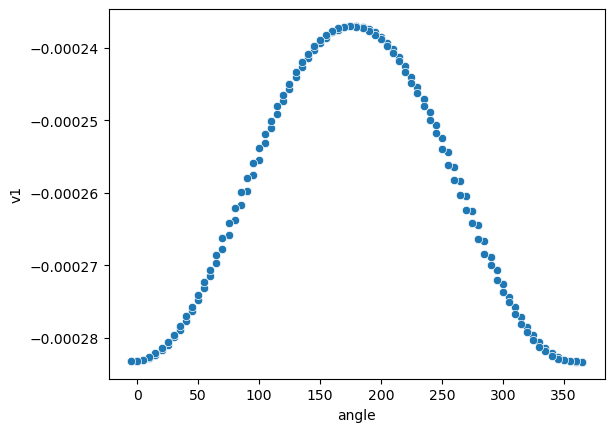

In [30]:
sns.scatterplot(x='angle', y='v1', data=data)

<AxesSubplot:xlabel='angle', ylabel='v2'>

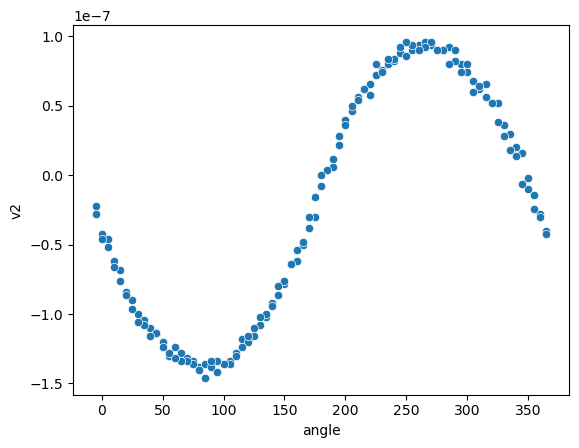

In [31]:
sns.scatterplot(x='angle', y='v2', data=data)

In [32]:
data = read_file(file_list[0])
data.head()

,angle,none,v1,v1e,v2,v2e
0,-4.9755,0.0,-0.000243,-0.000008,-1.300000e-08,0.000000e+00
1,0.0000,0.0,-0.000243,-0.000008,-3.100000e-08,0.000000e+00
2,4.9755,0.0,-0.000243,-0.000008,-4.800000e-08,-3.000000e-09
3,10.0045,0.0,-0.000243,-0.000008,-5.300000e-08,-1.000000e-09
4,14.9800,0.0,-0.000243,-0.000008,-6.900000e-08,-1.000000e-08


## Treatement of the magnetotransport data

As previously mentioned, the angle-dependant data have a strong OHE contribution. In order to calculate such contribution, the following function can be used. From the dataframe and the conditions, it plots the OHE contribution.

The last input is the color for the plot.

In [33]:
def OHE_rep_cos(data, I, H, T, c):
    # from dataframe, returns OHE
    
    par, cov = curve_fit(f=hyperb_cos, xdata=data['angle'], ydata=data['v1'], bounds=(-np.inf, np.inf),  maxfev=100000)
    print(par)
    Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'][0]/1e4 # Rh value for the temperature

    V_OHE = Rh*I*H/thickness#; value of voltage due to OHE
    OHE_values = hyperb_cos(data['angle'], V_OHE, par[1], par[2])
    
    plt.plot(data['angle'], OHE_values, label='OHE', color=c)
    plt.plot(data['angle'], data['v1'], label='total', ms=2, marker='o', color=c)
    plt.legend()
    plt.title('OHE + raw')
    return ()

Same with the anomalous Hall effect contribution (raw data -  OHE):

In [34]:
def AHE_rep_cos(data, I, H, T, c):
    # from dataframe, plots AHE
    
    par, cov = curve_fit(f=hyperb_cos, xdata=data['angle'], ydata=data['v1'], bounds=(-np.inf, np.inf),  maxfev=100000)

    Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'][0]/1e4 # Rh value for the temperature

    V_OHE = Rh*I*H/thickness#; value of voltage due to OHE
    #OHE_values = hyperb_cos(data['angle'], V_OHE, par[1], par[2])
    
    AHE_values = hyperb_cos(data['angle'], par[0] - V_OHE, par[1], par[2])
    print(par[0])
    
    plt.plot(data['angle'], AHE_values, label='AHE', color=c)
    plt.plot(data['angle'], data['v1'], label='total', ms=2, marker='o', color=c)
    plt.legend()
    plt.title('AHE + raw')
    
    print(par[0] - V_OHE)
    return ()

We find the files at 10K, 7T and plot them:

In [35]:
colorlist = ['r', 'b', 'g', 'black', 'violet']

In [36]:
# find files at 10 K, 7 T
files_10K_7T = []
for i, file in enumerate(file_list):
    if '10.0_K' in file:
        if '70000G' in file:
            print(file)
            files_10K_7T.append(i)

004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.002000A_peak_f_433.0Hz_T_10.0_K_1_2.dat
004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.004000A_peak_f_433.0Hz_T_10.0_K_1_2.dat
004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.006000A_peak_f_433.0Hz_T_10.0_K_1_2.dat
004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.008000A_peak_f_433.0Hz_T_10.0_K_1_2.dat
004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.010000A_peak_f_433.0Hz_T_10.0_K_1_2.dat


[-1.65350703e-05 -2.46313792e-04  3.04554603e+00]
[-3.47366016e-05 -4.93313192e-04  3.05427102e+00]
[-5.46273505e-05 -7.42101932e-04  3.04881136e+00]
[-7.59625510e-05 -9.93957197e-04  3.07540141e+00]
[-9.85650431e-05 -1.24961460e-03  3.08091186e+00]


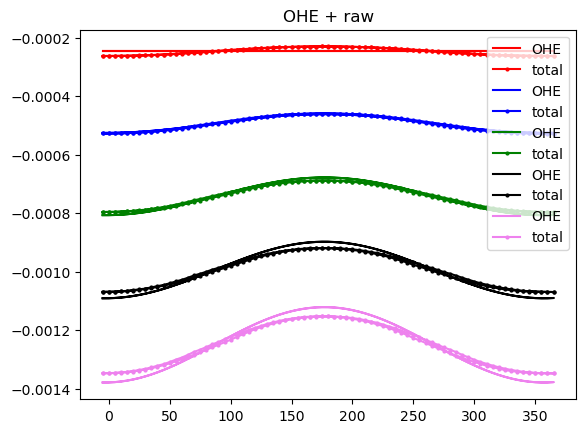

In [37]:
for i, index in enumerate(files_10K_7T):
    OHE_rep_cos(read_file(file_list[index]), i*2e-3, 70000, 10, colorlist[i])

-1.6535070349524973e-05
-1.6535070349524973e-05
-3.4736601556254815e-05
-2.538934931824818e-06
-5.4627350543815835e-05
9.76798270504416e-06
-7.596255102863043e-05
2.0630448844659557e-05
-9.856504308807058e-05
3.0225623409649413e-05


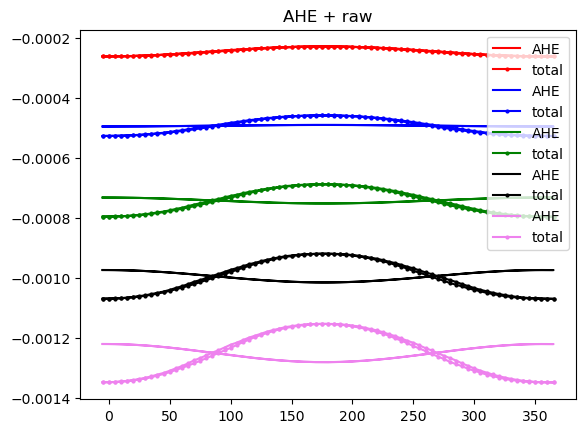

In [38]:
for i, index in enumerate(files_10K_7T):
    AHE_rep_cos(read_file(file_list[index]), i*2e-3, 70000, 10, colorlist[i])

Function to find AHE:

In [39]:
def AHE(data, I, H, T):
    # from dataframe, returns OHE
    
    par, cov = curve_fit(f=hyperb_cos, xdata=data['angle'], ydata=data['v1'], bounds=(-np.inf, np.inf),  maxfev=100000)

    try:
        Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'][0]/1e4 # Rh value for the temperature
    except:
        Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'].values/1e4 # Rh value for the temperature
        
    V_OHE = Rh*I*H/thickness#; value of voltage due to OHE
    return hyperb_cos(data['angle'], par[0] - V_OHE, par[1], par[2])

For the amplitude:

In [40]:
def AHE_amplitude(data, I, H, T):
    # from dataframe, returns OHE
    
    
    par, cov = curve_fit(f=hyperb_cos, xdata=data['angle'], ydata=data['v1'], bounds=(-np.inf, np.inf),  maxfev=100000)

    Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'].values[0]/1e4 # Rh value for the temperature

    V_OHE = Rh*I*H/thickness#; value of voltage due to OHE
    return par[0] - V_OHE

We see if AHE evolution with T and current matches what we expect:

In [41]:
AHE_list = pd.DataFrame(columns=('T', 'H', 'I', 'AHE'))
AHE_2_list = pd.DataFrame(columns=('T', 'H', 'I', 'AHE')) # no correction

for file in file_list:
    df, (current, field, temperature) = read_file_info(file)
    AHE_2_list.loc[len(AHE_2_list)] = [temperature, field, current, 0.5*(df['v1'].max() - df['v1'].min())]
    AHE_list.loc[len(AHE_list)] = [temperature, field, current, AHE_amplitude(df, current, field, temperature)]

In [42]:
AHE_list

,T,H,I,AHE
0,10.0,10000.0,0.002,0.000007
1,10.0,10000.0,0.004,0.000009
2,10.0,10000.0,0.002,0.000007
3,20.0,10000.0,0.002,0.000005
4,260.0,10000.0,0.002,-0.000008
...,...,...,...,...
297,140.0,70001.0,0.002,0.000002
298,140.0,70001.0,0.004,0.000004
299,140.0,70001.0,0.006,0.000006
300,140.0,70001.0,0.008,0.000006


In [43]:
l = 10e-6
D = 10e-6
d = 4.5e-6

geom_factor = D*d/l

In [44]:
AHE_list

,T,H,I,AHE
0,10.0,10000.0,0.002,0.000007
1,10.0,10000.0,0.004,0.000009
2,10.0,10000.0,0.002,0.000007
3,20.0,10000.0,0.002,0.000005
4,260.0,10000.0,0.002,-0.000008
...,...,...,...,...
297,140.0,70001.0,0.002,0.000002
298,140.0,70001.0,0.004,0.000004
299,140.0,70001.0,0.006,0.000006
300,140.0,70001.0,0.008,0.000006


In [45]:
AHE_list['rho_AHE'] = AHE_list['AHE']*geom_factor/AHE_list['I']

In [46]:
AHE_list[AHE_list['H'] >= 7e4].to_csv('AHE_list.csv')

Text(0.5, 1.0, 'AHE for different I, 7T')

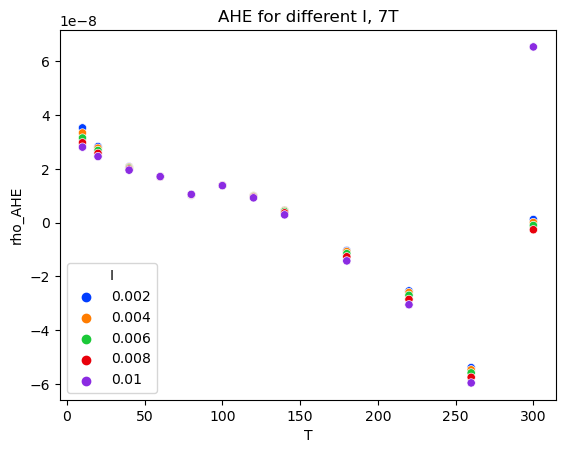

In [47]:
sns.scatterplot(x='T', y='rho_AHE', data=AHE_list[AHE_list['H'] >= 7e4], hue='I', palette='bright')
plt.title('AHE for different I, 7T')

As seen above, it matches the behaviour we expect (see figure in paper) :
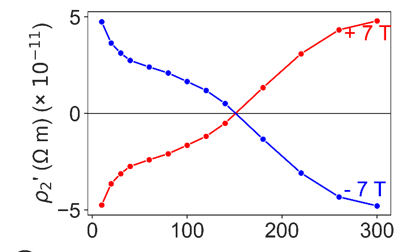

We compare with PHE values:

In [48]:
AHE_2_list[AHE_2_list['H'] >= 7e4].to_csv('AHE_2_list.csv') # no OHE correction

In [49]:
AHE_2_list['rho_AHE'] = AHE_2_list['AHE']*geom_factor/AHE_list['I']

Text(0.5, 1.0, 'AHE for different I, 7T')

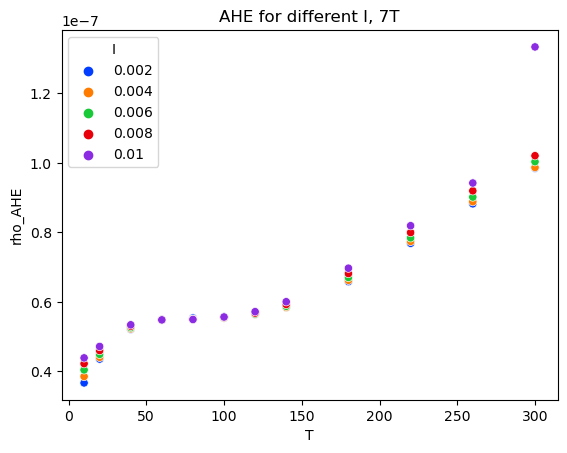

In [50]:
sns.scatterplot(x='T', y='rho_AHE', data=AHE_2_list[AHE_2_list['H'] >= 7e4], hue='I', palette='bright')
plt.title('AHE for different I, 7T')

In [51]:
AHE_list['R_AHE'] = AHE_list['AHE']/AHE_list['I']

In [52]:
os.chdir(home_cwd)
os.chdir('..')
os.chdir(Path(os.getcwd(), 'AP098 FVO_Pt_In-Plane_depend', 'AP098 FVO_Pt_In-Plane_depend'))

In [53]:
PHE_values = pd.read_csv('PHE_values.csv').sort_values('T')
PHE_values['R_PHE'] = PHE_values['PHE']/0.001 # for the resistance
AHE_values = AHE_list[(AHE_list['H'] >= 70000) & (AHE_list['I'] == 0.01)].sort_values('T')

In [54]:
AHE_values

,T,H,I,AHE,rho_AHE,R_AHE
286,10.0,70000.0,0.01,0.000062,2.809048e-08,0.006242
290,20.0,70000.0,0.01,0.000055,2.458868e-08,0.005464
294,40.0,70000.0,0.01,0.000043,1.951808e-08,0.004337
295,60.0,70000.0,0.01,0.000038,1.712738e-08,0.003806
296,80.0,70000.0,0.01,0.000023,1.050443e-08,0.002334
287,100.0,70000.0,0.01,0.000031,1.375816e-08,0.003057
288,120.0,70000.0,0.01,0.000020,9.217030e-09,0.002048
301,140.0,70001.0,0.01,0.000006,2.889801e-09,0.000642
289,180.0,70000.0,0.01,-0.000032,-1.424493e-08,-0.003166
291,220.0,70000.0,0.01,-0.000068,-3.054772e-08,-0.006788


In [55]:
PHE_values

,Unnamed: 0,T,PHE,R_PHE
0,0,5.0,0.000006,0.005868
1,1,10.0,0.000006,0.005599
2,2,20.0,0.000005,0.004892
3,3,40.0,0.000004,0.004389
4,4,60.0,0.000004,0.004414
5,5,80.0,0.000005,0.004536
6,6,100.0,0.000005,0.004702
7,7,120.0,0.000005,0.005038
8,8,140.0,0.000006,0.005593
9,9,180.0,0.000006,0.006446


In [56]:
AHE_PHE = pd.DataFrame(columns=('T', 'AHE', 'PHE', 'ratio'))
for T in AHE_values['T'].unique():
    AHE_value = AHE_values[AHE_values['T'] == T]['R_AHE'].values[0]
    PHE_value = PHE_values[PHE_values['T'] == T]['R_PHE'].values[0]
    AHE_PHE.loc[len(AHE_PHE)] = (T, AHE_value, PHE_value, AHE_value/PHE_value)

In [57]:
AHE_PHE

,T,AHE,PHE,ratio
0,10.0,0.006242,0.005599,1.114989
1,20.0,0.005464,0.004892,1.116951
2,40.0,0.004337,0.004389,0.988199
3,60.0,0.003806,0.004414,0.862217
4,80.0,0.002334,0.004536,0.514602
5,100.0,0.003057,0.004702,0.650238
6,120.0,0.002048,0.005038,0.406520
7,140.0,0.000642,0.005593,0.114827
8,180.0,-0.003166,0.006446,-0.491069
9,220.0,-0.006788,0.007272,-0.933532


<AxesSubplot:xlabel='T', ylabel='ratio'>

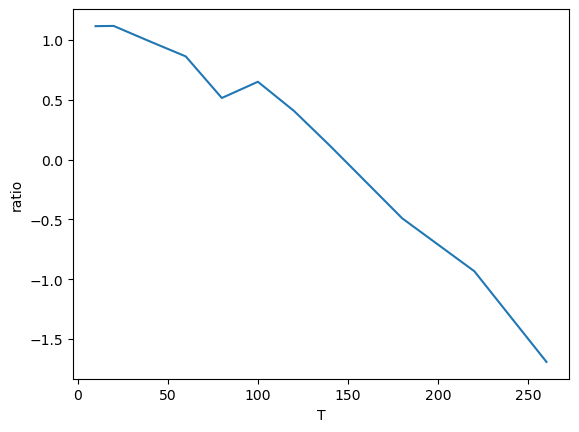

In [58]:
sns.lineplot(x='T', y='ratio', data=AHE_PHE[AHE_PHE['T']<300])

## From AHE data, obtention of $H_{k}$

For the obtention of $H_{k}$, we use the follwing relationship:

$sin(θ_{M}) = 2H_{ext} * sin (θ_{H} - θ_{M})$

We define complete $cos$ function with a thermal drift: $A * cos(x + c) + b + d*x$:

In [59]:
def hyperb_cos_mod(X, a, b, c, d, e):
    return [a + b* math.cos((x + c)*math.pi/180) + d*x for x in X]

And rewrite AHE function to use this new correction.

In [60]:
def AHE_mod(data, I, H, T):
    # from dataframe, returns AHE
    
    par, cov = curve_fit(f=hyperb_cos_mod, xdata=data['angle'], ydata=data['v1'], bounds=(-np.inf, np.inf),  maxfev=100000)

    try:
        Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'][0]/1e4 # Rh value for the temperature
    except:
        Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'].values[0]/1e4 # Rh value for the temperature
        
    V_OHE = Rh*I*H/thickness#; value of voltage due to OHE

    raw_centered = data['v1'] - par[3]*data['angle']
    # OHE signal:
    OHE = hyperb_cos_mod(data['angle'] + 180, 0, V_OHE, par[2], 0, par[4])
    
    # AHE:
    AHE = np.array(raw_centered) - np.array(OHE)
    return  AHE

Same function plus representation:

In [61]:
def AHE_mod_rep(data, I, H, T):
    # from dataframe, returns OHE
    
    par, cov = curve_fit(f=hyperb_cos_mod, xdata=data['angle'], ydata=data['v1'], bounds=(-np.inf, np.inf),  maxfev=100000)

    try:
        Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'][0]/1e4 # Rh value for the temperature
    except:
        Rh = df_correct[(df_correct['T (K)'] == T)]['Rh'].values/1e4 # Rh value for the temperature
        
    V_OHE = Rh*I*H/thickness#; value of voltage due to OHE

    plt.plot(data['angle'], data['v1'], label='raw')
    raw_centered = data['v1'] - par[3]*data['angle']
    plt.plot(data['angle'], raw_centered, label='corrected')
    
    # OHE signal:
    OHE = hyperb_cos_mod(data['angle'] + 180, 0, V_OHE, par[2], 0, par[4])
    OHE_plus_off = hyperb_cos_mod(data['angle'] + 180, par[0], V_OHE, par[2], 0, par[4])
    plt.plot(data['angle'], OHE_plus_off, label='OHE')
    # AHE:
    AHE = raw_centered - OHE
    print(par)
    
    plt.plot(data['angle'], AHE, label='AHE')
    
    plt.legend()

We modify AHE then. We make test just with half of the data (way to go):

In [62]:
DATA, (current, field, temperature) = read_file_info(file_list[0])

data = DATA[:int(len(DATA)/2)]
data['AHE'] = AHE_mod(data, current, field, temperature) # very rough
data['thetaH'] = data['angle'] - 180.129 # real theta_M

amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

data['AHE_cor'] = data['AHE'] - offset_AHE
data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))
data['thetaM'] = data['AHE_rel'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H

$theta_{M}$ vs. $theta_{H}$ is linear, showing the offset is constant:

Text(0, 0.5, '$theta_{M}$')

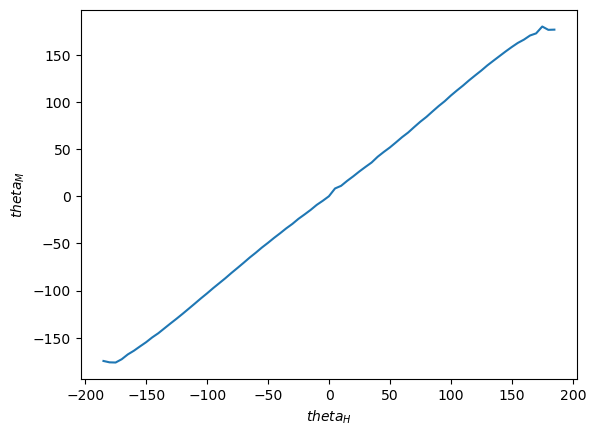

In [63]:
plt.plot(data['thetaH'], data['thetaM'])
plt.xlabel('$theta_{H}$')
plt.ylabel('$theta_{M}$')

If we plot the first harmonic, it gives:

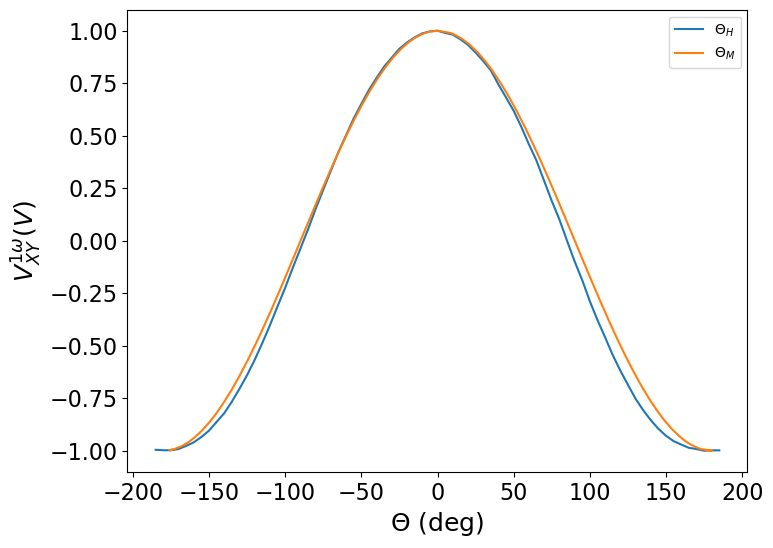

In [64]:
plt.figure(figsize=(8,6))
plt.xlabel("$\Theta$ (deg)", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("$V_{XY}^{1\omega} (V)$", fontsize=18)
plt.yticks(fontsize=16)

plt.plot(data['thetaH'], data['AHE_rel'], label='$\Theta_{H}$')
plt.plot(data['thetaM'], data['AHE_rel'], label='$\Theta_{M}$')
plt.legend()

The data is not symmetric, we can change it:

In [65]:
# Assymetry correction:
data['thetaM'] = data['thetaM'] + (data[data['AHE_rel'] == data['AHE_rel'].max()]['thetaH'].values[0] - data[data['AHE_rel'] == data['AHE_rel'].max()]['thetaM'].values[0])

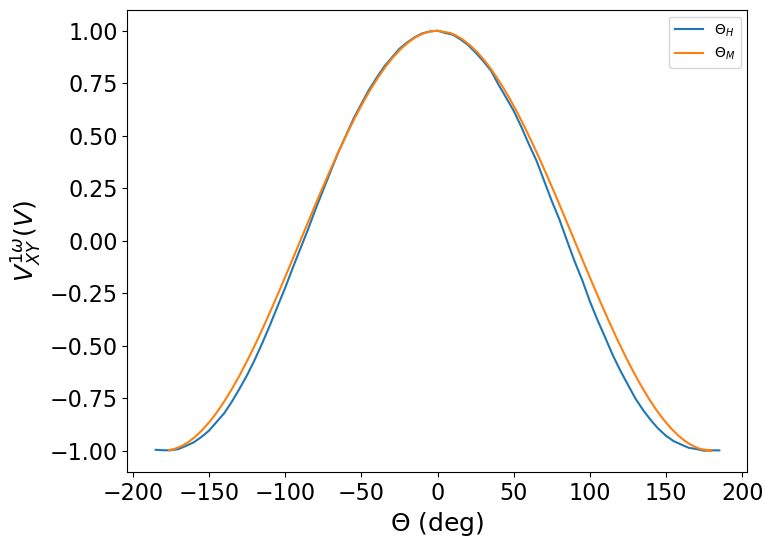

In [66]:
plt.figure(figsize=(8,6))
plt.xlabel("$\Theta$ (deg)", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("$V_{XY}^{1\omega} (V)$", fontsize=18)
plt.yticks(fontsize=16)

plt.plot(data['thetaH'], data['AHE_rel'], label='$\Theta_{H}$')
plt.plot(data['thetaM'], data['AHE_rel'], label='$\Theta_{M}$')
plt.legend()

Almost no change. We observe the difference between the two angles:

<AxesSubplot:xlabel='thetaH', ylabel='difHM'>

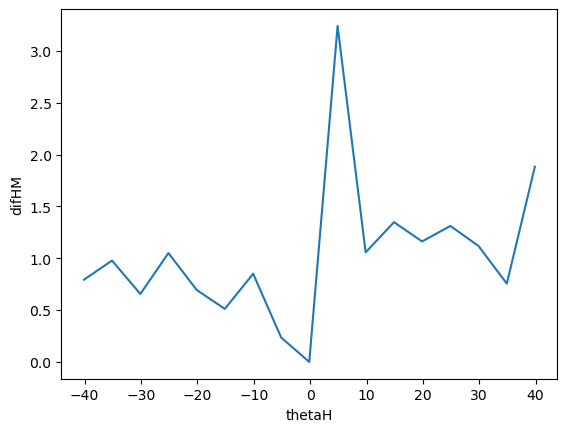

In [67]:
data['difHM'] = data['thetaM'] - data['thetaH']
sns.lineplot(x ='thetaH', y ='difHM', data=data[(data['thetaH'] < 41) & (data['thetaH'] > -41)])

We center the data around the minimum/maximum:

In [68]:
minimum_index = data[data['AHE_cor'] == data['AHE_cor'].max()].index[0]
data_small_angle = data.loc[minimum_index-3:minimum_index+3]

And perform the linear fit for the obtention of $H_{k}$:

In [69]:
def lin_fit(X, a, b):
    return [a*x + b for x in X]

In [70]:
# y term for the Hk fit:
Hk_y = data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(2 * x*math.pi/180))
# x term:
Hk_x = field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180)

In [71]:
lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
Hk = 1/lin_par[0]

Text(0, 0, 'Hk = -1952.0 Oe')

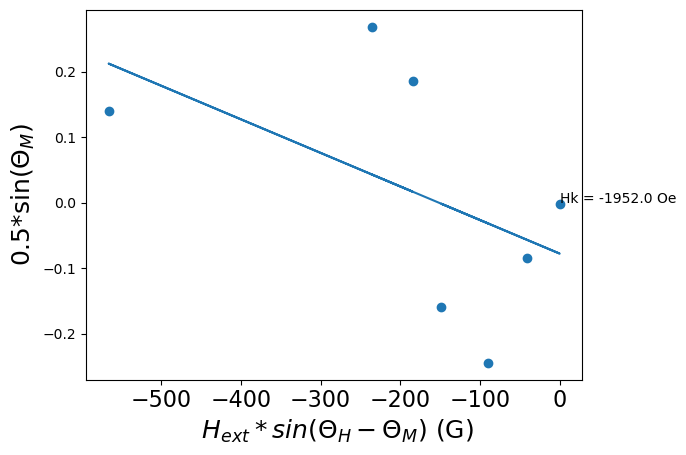

In [72]:
plt.scatter(Hk_x, Hk_y, marker = 'o')
plt.plot(Hk_x, [x*lin_par[0] + lin_par[1] for x in Hk_x])

plt.xlabel(" $ H_{ext} * sin(\Theta_H-\Theta_M) $ (G)", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("0.5*sin($\Theta_{M}$)", fontsize=18)

plt.text(0, 0, f'Hk = {np.round(Hk)} Oe')

The fit is really bad. It may come from the fact that the data is very noisy.

One can see that there is a constant offset between the two datas:

<AxesSubplot:xlabel='thetaH', ylabel='AHE_rel'>

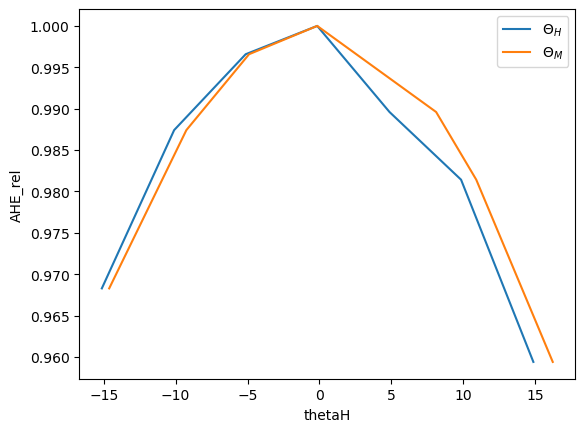

In [73]:
sns.lineplot(x='thetaH', y='AHE_rel', data=data_small_angle,  label='$\Theta_{H}$')
sns.lineplot(x='thetaM', y='AHE_rel', data=data_small_angle,  label='$\Theta_{M}$')

We try to fit raw data with quadratic function so that the fit improves:

In [74]:
def quad(X, a, b, c, d, e):
    return [a*(x - b)**4 + c*(x - b)**2 + 1 for x in X]

We repeat the whole process on a random file:

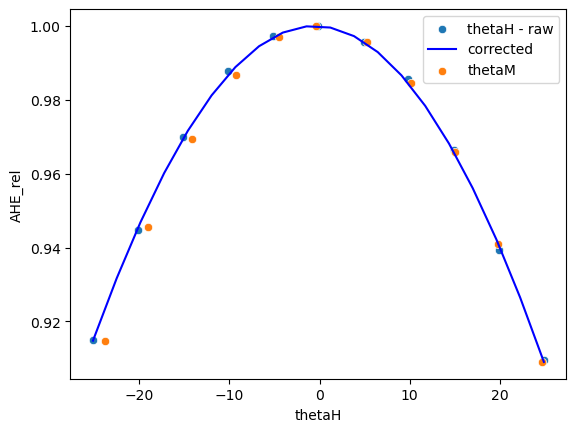

In [75]:
DATA, (current, field, temperature) = read_file_info(file_list[295])

data = DATA.loc[:int(len(DATA)/2)]

data['AHE'] = AHE_mod(data, current, field, temperature) 
data['thetaH'] = data['angle'] - 180.129 # real theta_M

amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

# we use directly around theta = 0:

data['thetaH_abs'] = data['thetaH'].apply(abs)
minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

data['AHE_cor'] = data['AHE'] - offset_AHE
data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))

data_small_angle = data.loc[minimum_index-5:minimum_index+5]

q, cov = curve_fit(quad, xdata=data_small_angle['thetaH'], ydata=data_small_angle['AHE_rel'])
data_small_angle['AHE_q'] = quad(data_small_angle['thetaH'], q[0], q[1], q[2], q[3], q[4])
data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H


sns.scatterplot(x='thetaH', y='AHE_rel', data=data_small_angle, label='thetaH - raw')

theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)
AHE_q_fic = quad(theta_H_fic, q[0], q[1], q[2], q[3], q[4])
plt.plot(theta_H_fic, AHE_q_fic, color='blue', label='corrected')

sns.scatterplot(x='thetaM', y='AHE_q', data=data_small_angle, label='thetaM')

plt.legend()

Text(0, 0.5, '0.5*sin($\\Theta_{M}$)')

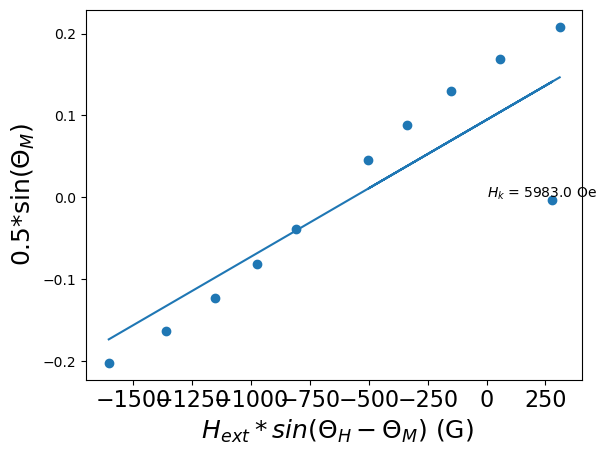

In [76]:
# y term for the Hk fit:
Hk_y = data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(x*math.pi/180))
# x term:
Hk_x = field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180)

lin_par, cov = curve_fit(lin_fit, xdata=Hk_x[1:-1], ydata=Hk_y[1:-1])

Hk = 1/lin_par[0]

plt.text(0,0,f"$H_{'k'}$ = {np.round(Hk)} Oe")

plt.scatter(Hk_x, Hk_y, marker = 'o')
plt.plot(Hk_x, [x*lin_par[0] + lin_par[1] for x in Hk_x])

plt.xlabel(" $ H_{ext} * sin(\Theta_H-\Theta_M) $ (G)", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("0.5*sin($\Theta_{M}$)", fontsize=18)


We redefine to be able to get rid of outliers

In [77]:
#y_term:
Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(x*math.pi/180)))
# x term:
Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]

In [78]:
Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
Hk_data.columns=('x', 'y', 'pred')
# squared error:
Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

# average distance from mean
Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()


In [79]:
Hk_data

,x,y,pred,MSE,mse,distance
0,-1604.348032,-0.201982,-0.190282,0.000137,-0.856716,3.886160
1,-1359.239084,-0.162767,-0.144619,0.000329,-0.655260,2.350495
2,-1153.851192,-0.122573,-0.106355,0.000263,-0.724675,1.359423
3,-973.172368,-0.080883,-0.072695,0.000067,-0.929824,0.710527
4,-811.472638,-0.038936,-0.042571,0.000013,-0.986173,0.306742
5,279.039638,-0.003346,0.160590,0.026875,27.131192,1.948142
6,-501.679694,0.046052,0.015143,0.000955,0.000000,0.000000
7,-337.748357,0.087906,0.045683,0.001783,0.866121,0.085892
8,-153.223402,0.129443,0.080060,0.002439,1.552631,0.388086
9,57.671509,0.169425,0.119349,0.002508,1.624762,1.000000


A nice filter seems to be when the 'mse' column is less than 5 (threshold) and a relative distance of 5:

Text(0, 0.5, '0.5*sin($\\Theta_{M}$)')

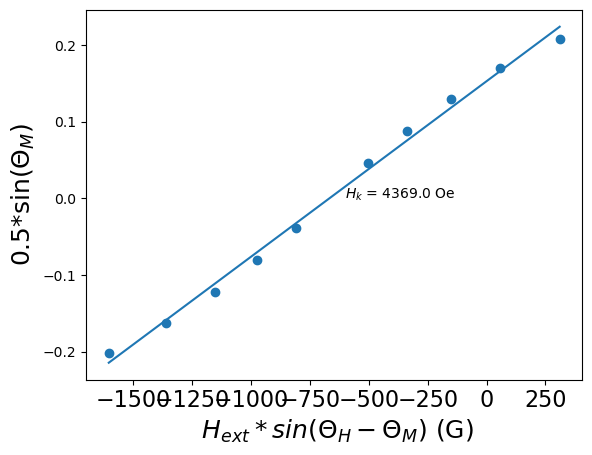

In [80]:
threshold = 5
max_distance = 5
filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]
lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

Hk = 1/lin_par[0]

plt.text(-600,0,f"$H_{'k'}$ = {np.round(Hk)} Oe")

plt.scatter(filtered_df['x'], filtered_df['y'], marker = 'o')
plt.plot(filtered_df['x'], [x*lin_par[0] + lin_par[1] for x in filtered_df['x']])

plt.xlabel(" $ H_{ext} * sin(\Theta_H-\Theta_M) $ (G)", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("0.5*sin($\Theta_{M}$)", fontsize=18)


In [81]:
rep = filtered_df

We repeat treatment on the other half of the data:

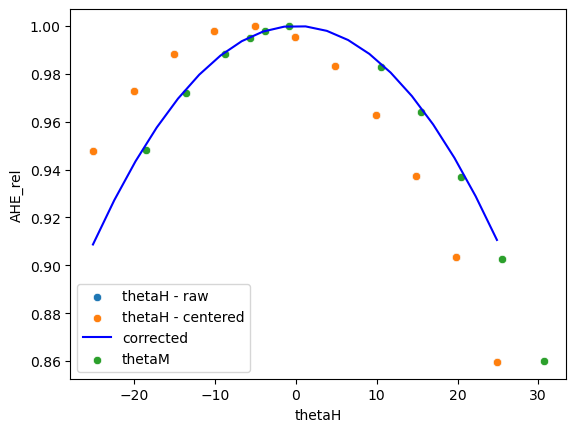

In [82]:
DATA, (current, field, temperature) = read_file_info(file_list[295])

data = DATA.loc[int(len(DATA)/2):]

data['AHE'] = AHE_mod(data, current, field, temperature) 
data['thetaH'] = data['angle'] - 180.129 # real theta_M

amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

# we use directly around theta = 0:

data['thetaH_abs'] = data['thetaH'].apply(abs)
minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

data['AHE_cor'] = data['AHE'] - offset_AHE
data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))

data_small_angle = data.loc[minimum_index-5:minimum_index+5]

q, cov = curve_fit(quad, xdata=data_small_angle['thetaH'], ydata=data_small_angle['AHE_rel'])
data_small_angle['AHE_q'] = quad(data_small_angle['thetaH'], q[0], q[1], q[2], q[3], q[4])
data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H

sns.scatterplot(x='thetaH', y='AHE_rel', data=data_small_angle, label='thetaH - raw')
# set-up correction:
#data_small_angle['thetaH'] -= q[1] 
sns.scatterplot(x='thetaH', y='AHE_rel', data=data_small_angle, label='thetaH - centered')

theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)
AHE_q_fic = quad(theta_H_fic, q[0], 0, q[2], q[3], q[4])
plt.plot(theta_H_fic, AHE_q_fic, color='blue', label='corrected')

sns.scatterplot(x='thetaM', y='AHE_q', data=data_small_angle, label='thetaM')
#sns.lineplot(x='thetaM', y='AHE_q', data=data_small_angle)

plt.legend()

#data['thetaM'] = data['AHE_rel'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H

Text(0, 0.5, '0.5*sin($\\Theta_{M}$)')

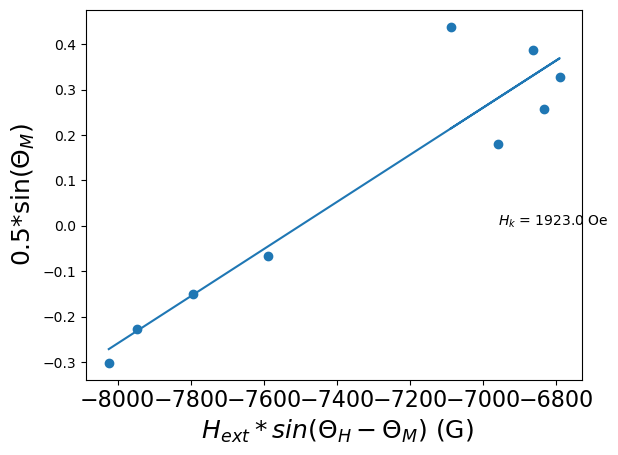

In [83]:
#y_term:
Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(2 * x*math.pi/180)))
# x term:
Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]


Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
Hk_data.columns=('x', 'y', 'pred')

# squared error:
Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

# average distance from mean
Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()

threshold = 5
max_distance = 5
filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]

lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

Hk = 1/lin_par[0]

plt.text(Hk_data['x'].median(),0,f"$H_{'k'}$ = {np.round(Hk)} Oe")

plt.scatter(filtered_df['x'], filtered_df['y'], marker = 'o')
plt.plot(filtered_df['x'], [x*lin_par[0] + lin_par[1] for x in filtered_df['x']])

plt.xlabel(" $ H_{ext} * sin(\Theta_H-\Theta_M) $ (G)", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("0.5*sin($\Theta_{M}$)", fontsize=18)


The values are not ideally close, but at least they have the same order of magnitude.
We remove head and tail because more anomalous data.

In [84]:
def Hk_finder(file):
    # consider way to go and way back:
    DATA, (current, field, temperature) = read_file_info(file)
    data_go, data_back = DATA.loc[len(DATA)//2:], DATA.loc[:len(DATA)//2]
    
    Hk = []
    for data in (data_go, data_back):

        data['AHE'] = AHE_mod(data, current, field, temperature) 
        data['thetaH'] = data['angle'] - 180.129 # real theta_M

        amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
        offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
        sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
        sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

        # we use directly around theta = 0:

        data['thetaH_abs'] = data['thetaH'].apply(abs)
        minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

        data['AHE_cor'] = data['AHE'] - offset_AHE
        data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
        data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

        sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))
        data_small_angle = data.loc[minimum_index-5:minimum_index+5]

        q, cov = curve_fit(quad, xdata=data_small_angle['thetaH'], ydata=data_small_angle['AHE_rel'])
        data_small_angle['AHE_q'] = quad(data_small_angle['thetaH'], q[0], 0, q[2], q[3], q[4])
        try:
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        except:
            # to avoid math error:
            #print('Math error, correction done.')
            data_small_angle['AHE_q'] = data_small_angle['AHE_q'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        
        # set-up correction:
        data_small_angle['thetaH'] -= q[1] 
        theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)

        
        # y term:
        Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(x*math.pi/180)))
        # x term:
        Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

        lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
        Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]

        Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
        Hk_data.columns=('x', 'y', 'pred')
        # squared error:
        Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
        Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

        # average distance from mean
        Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
        Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()


        # outlier elimination
        threshold = 5
        max_distance = 10
        
        filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]
        
        filtered_df.sort_values('x').reset_index().loc[1:len(filtered_df)-1] # head and tail elimination for ever been data
        lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

        Hk.append(1/lin_par[0])
    return Hk

In [85]:
Hk_finder(file_list[295])

[3696.540383499224, 4368.134341506685]

Plus representation to verify good fit:

In [86]:
def Hk_finder_rep(file):
    # consider way to go and way back:
    DATA, (current, field, temperature) = read_file_info(file)
    data_go, data_back = DATA.loc[len(DATA)//2:], DATA.loc[:len(DATA)//2]
    Hk = []
    for data in (data_go, data_back):

        data['AHE'] = AHE_mod(data, current, field, temperature) 
        data['thetaH'] = data['angle'] - 180.129 # real theta_M

        amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
        offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
        sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
        sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

        # we use directly around theta = 0:

        data['thetaH_abs'] = data['thetaH'].apply(abs)
        minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

        data['AHE_cor'] = data['AHE'] - offset_AHE
        data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
        data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

        sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))
        data_small_angle = data.loc[minimum_index-5:minimum_index+5]

        q, cov = curve_fit(quad, xdata=data_small_angle['thetaH'], ydata=data_small_angle['AHE_rel'])
        
        data_small_angle['AHE_q'] = quad(data_small_angle['thetaH'], q[0], 0, q[2], q[3], q[4])
        try:
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        except:
            # to avoid math error:
            print('Math error, correction done.')
            data_small_angle['AHE_q'] = data_small_angle['AHE_q'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        
        
        # set-up correction:
        data_small_angle['thetaH'] -= q[1] 
        theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)

        
        # y term:
        Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(x*math.pi/180)))
        # x term:
        Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

        lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
        Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]

        Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
        Hk_data.columns=('x', 'y', 'pred')
        # squared error:
        Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
        Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

        # average distance from mean
        Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
        Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()


        # outlier elimination
        threshold = 5
        max_distance = 10
        
        filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]
        
        filtered_df.sort_values('x').reset_index().loc[1:len(filtered_df)-1] # head and tail elimination for ever been data
        lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

        Hk.append(1/lin_par[0])

        plt.scatter(Hk_data['x'], Hk_data['y'], marker = 'o')
        plt.plot(Hk_data['x'], [x*lin_par[0] + lin_par[1] for x in Hk_data['x']])

        plt.xlabel(" $ H_{ext} * sin(\Theta_H-\Theta_M) $ (G)", fontsize=18)
        plt.xticks(fontsize=16)
        plt.ylabel("0.5*sin($\Theta_{M}$)", fontsize=18)
        
#sns.lineplot(x='thetaM', y='AHE_q', data=data_small_angle)
    return Hk

[3696.540383499224, 4368.134341506685]

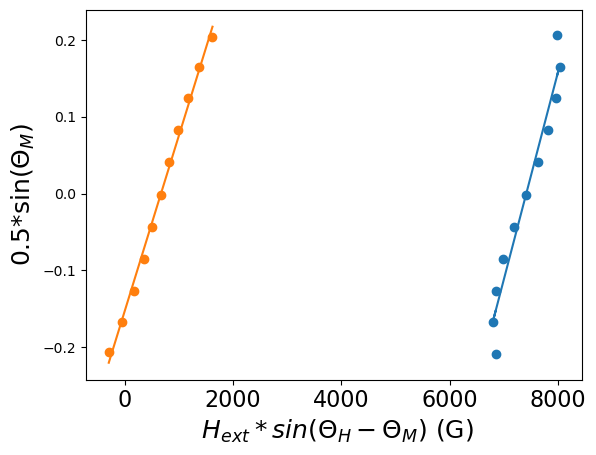

In [87]:
Hk_finder_rep(file_list[295])

Check fits for file_lists 60 K; 0.01 A

In [88]:
file_list_60K_10mA = list(filter(lambda x: ('_60.0_K' in x) and ('0.01' in x), file_list))

[-658.0009003821007, -831.2959002997532] 004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_10000G_I_0.010000A_peak_f_433.0Hz_T_60.0_K_1_2.dat
[2005.918515101584, 2257.3665240835853] 004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_30001G_I_0.010000A_peak_f_433.0Hz_T_60.0_K_1_2.dat
[3421.7333427991357, 3740.127208634712] 004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_50001G_I_0.010000A_peak_f_433.0Hz_T_60.0_K_1_2.dat
[3263.747256083279, 4088.697843057253] 004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_60000G_I_0.010000A_peak_f_433.0Hz_T_60.0_K_1_2.dat
[3696.540383499224, 4368.134341506685] 004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um_i7-10_v8-14_H_70000G_I_0.010000A_peak_f_433.0Hz_T_60.0_K_1_2.dat


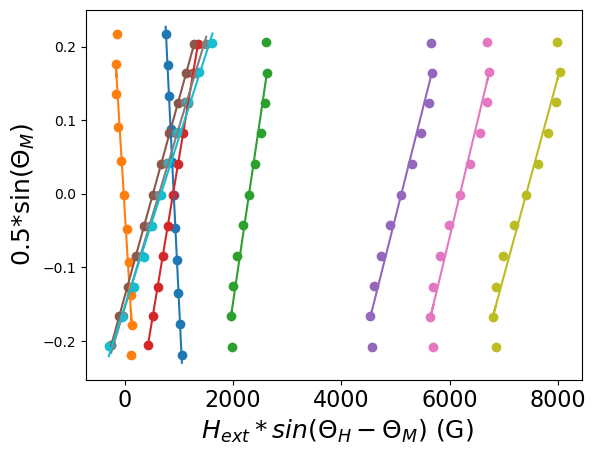

In [89]:
for file in file_list_60K_10mA:
    print(Hk_finder_rep(file), file)

Nice fits only at high fields. We impose this condition:

[1976.6658065298554, 2650.095704116936]
[2464.288507363283, 3133.6469165943136]


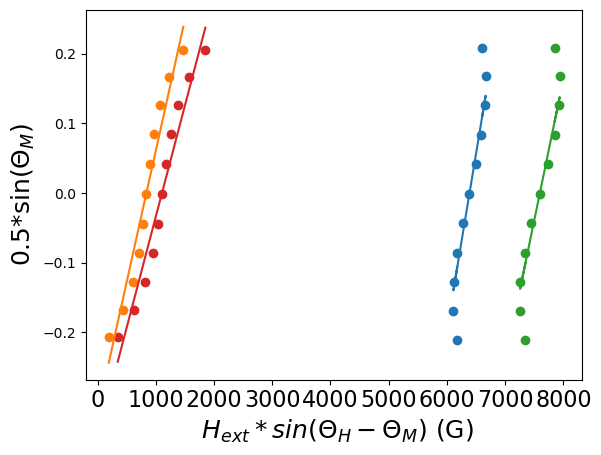

In [90]:
file_list_80K_10mA = list(filter(lambda x: ('_80.0_K' in x) and ('0.01' in x), file_list))
for file in file_list_80K_10mA:
    field = int(file[file.index('H_')+2:file.index('G_')])
    if field >= 60000:
        print(Hk_finder_rep(file))

[4303.481158722343, 4785.527243802673]
[4428.042513969654, 5183.051597060108]
[4202.396872007625, 5241.398316409457]


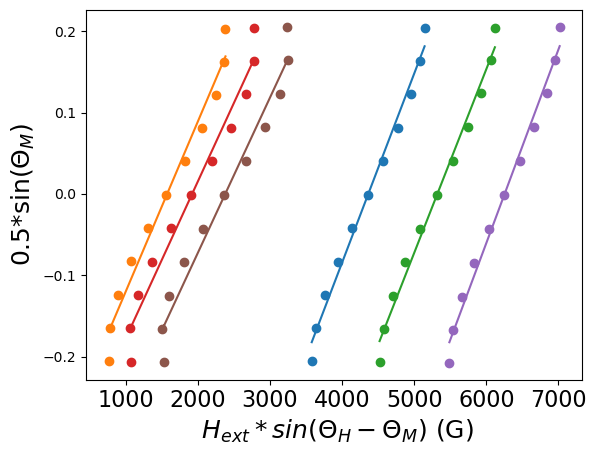

In [91]:
file_list_40K_10mA = list(filter(lambda x: ('_40.0_K' in x) and ('0.01' in x), file_list))
for file in file_list_40K_10mA:
    field = int(file[file.index('H_')+2:file.index('G_')])
    if field >= 40000:
        print(Hk_finder_rep(file))

Values seem to increase with lower temperature, we keep the values in a dataframe:

In [92]:
# Dataframe with file info

file_info = pd.DataFrame(columns=('file', 'T', 'H', 'A'))
for file in file_list:
    temperature = float(file[file.index('T_')+2:file.index('_K')])
    field = float(file[file.index('H_')+2:file.index('G_')])
    current = float(file[file.index('I_')+2:file.index('A_')])
    file_info.loc[len(file_info)] = (file, temperature, field, current)
    
file_info.sort_values('T', inplace=True)
file_info.reset_index(inplace=True)

In [93]:
file_info.head()

,index,file,T,H,A
0,0,003_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...,10.0,10000.0,0.002
1,122,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...,10.0,50000.0,0.002
2,158,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...,10.0,50000.0,0.010
3,275,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...,10.0,70000.0,0.008
4,253,004_Vxy(AMR-2w)-AP98-FVO-Pt(4nm)_4w_c3l5_w10um...,10.0,70000.0,0.004


In [94]:
Hk_vs_T = pd.DataFrame(columns=('T', 'I', 0, 1, 2, 3, 4, 5))

file_info_filtered = file_info[file_info['H'] >= 4e4]
for temperature in file_info_filtered['T'].unique():
    print(temperature)
    # dataframe with the temperature of interest:
    for current in file_info_filtered[file_info_filtered['T'] == temperature]['A'].unique():
        row = [temperature, current]
        # three files of interest:
        three_files = file_info_filtered[(file_info_filtered['T'] == temperature) & (file_info_filtered['A'] == current)]['file']
        for file in three_files:
            Hk_values = Hk_finder(file)
            row.append(Hk_values[0]), row.append(Hk_values[1])
            
        Hk_vs_T.loc[len(Hk_vs_T)] = row

10.0
20.0
40.0
60.0
80.0
100.0
120.0
140.0
180.0
220.0
260.0
300.0


In [95]:
Hk_vs_T['Hk'] = Hk_vs_T[[0,1,2,3,4,5]].mean(axis=1)

<AxesSubplot:xlabel='T', ylabel='Hk'>

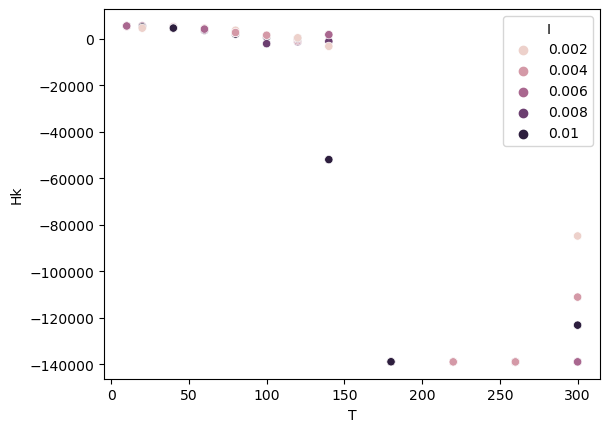

In [96]:
sns.scatterplot(x='T', y='Hk', data=Hk_vs_T, hue='I')

We plot data at only 150 K:

In [97]:
# Standard deviation:

In [98]:
Hk_vs_T['std'] = Hk_vs_T[[0,1,2,3,4,5]].std(axis=1)

In [99]:
Hk_vs_T_lowT = Hk_vs_T[Hk_vs_T['T'] < 150]

<AxesSubplot:xlabel='T', ylabel='Hk'>

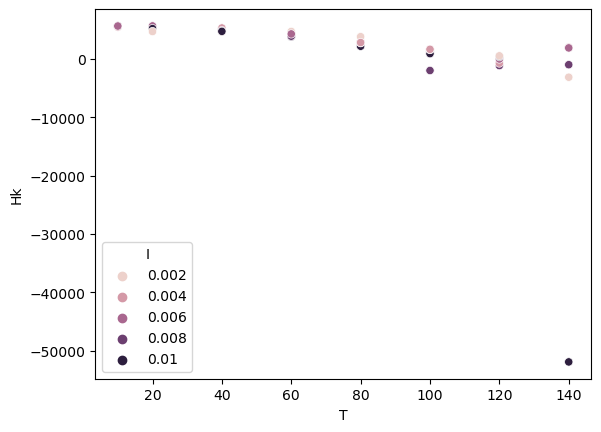

In [100]:
sns.scatterplot(x='T', y='Hk', data=Hk_vs_T_lowT, hue='I')

Nicer plot, more paper-like:

In [101]:
Hk_vs_T_lowT['I'].unique()

array([0.002, 0.01 , 0.008, 0.004, 0.006])

We get rid of ridiculous errors:

In [102]:
Hk_vs_T_lowT['std']

0       1869.723054
1        283.550181
2        474.742549
3        240.245378
4        336.941761
5        282.255099
6        470.589467
7        318.916889
8        275.684408
9        947.042211
10       421.248573
11       575.800622
12       199.565934
13       954.964838
14       449.897378
15       410.590495
16       315.764594
17       416.587328
18      1165.789309
19       198.279578
20       745.476062
21       477.825990
22       607.707760
23       276.423819
24       720.933995
25       505.037713
26      1544.659025
27      1409.759829
28      1618.943604
29      6128.079235
30       497.132707
31     10838.892531
32      1618.233677
33      2914.689827
34      2208.206202
35      6312.335088
36    126593.312266
37      1197.691401
38      6617.571379
39      6654.417753
Name: std, dtype: float64

In [103]:
Hk_vs_T_lowT = Hk_vs_T_lowT[Hk_vs_T_lowT['std'] < 5000]

In [104]:
Hk_vs_T_lowT['std']

0     1869.723054
1      283.550181
2      474.742549
3      240.245378
4      336.941761
5      282.255099
6      470.589467
7      318.916889
8      275.684408
9      947.042211
10     421.248573
11     575.800622
12     199.565934
13     954.964838
14     449.897378
15     410.590495
16     315.764594
17     416.587328
18    1165.789309
19     198.279578
20     745.476062
21     477.825990
22     607.707760
23     276.423819
24     720.933995
25     505.037713
26    1544.659025
27    1409.759829
28    1618.943604
30     497.132707
32    1618.233677
33    2914.689827
34    2208.206202
37    1197.691401
Name: std, dtype: float64

0
1
2
3
4


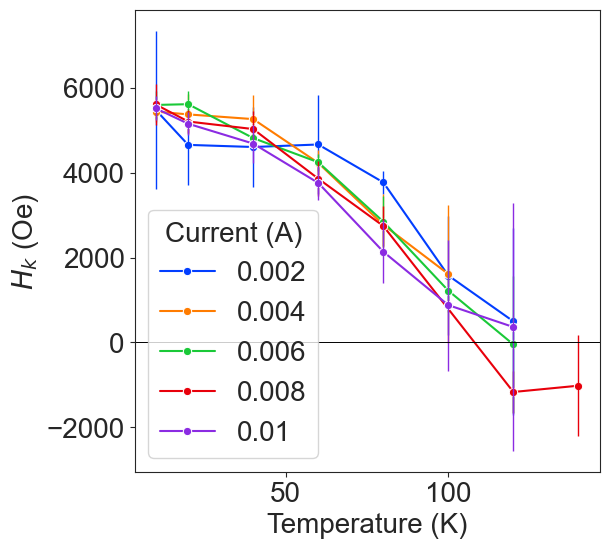

In [105]:
plt.figure(figsize=(6,6))
sns.set_style("ticks")
plt.rcParams['font.size'] = 20

plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel(r'$H_{k}$ (Oe)', fontsize=20)

for j, I in enumerate(Hk_vs_T_lowT.sort_values('I')['I'].unique()):
    df_I = Hk_vs_T_lowT[Hk_vs_T_lowT['I'] == I]
    sns.lineplot(x='T', y='Hk', data=df_I, marker='o', color=sns.color_palette('bright', 15).as_hex()[j], label=I)
    plt.errorbar(x=df_I['T'], y=df_I['Hk'], yerr=df_I['std'], fmt='none', elinewidth=1, color=sns.color_palette('bright', 15).as_hex()[j])
    print(j)
plt.axhline(y=0.5, color='black', lw=0.7, linestyle='-')
    
plt.legend(title='Current (A)')
#plt.errorbar(x=t.index, y=t['torque_2'], yerr=t["torque_e"], fmt='none', elinewidth=1, color='blue')

All plots give same values. Decreasing behaviour with temperature. We manually group by temperature:

In [106]:
Hk_as_T = pd.DataFrame(columns=('T', 'Hk', 'std'))

for T in Hk_vs_T_lowT['T'].unique():
    df_T = Hk_vs_T_lowT[Hk_vs_T_lowT['T'] == T]
    Hk_as_T.loc[len(Hk_as_T)] = (T, df_T['Hk'].mean(), df_T['std'].mean())

In [107]:
Hk_as_T

,T,Hk,std
0,10.0,5534.563727,641.040585
1,20.0,5205.935257,458.897615
2,40.0,4884.420361,520.295469
3,60.0,4156.179347,501.402261
4,80.0,2858.173629,565.673525
5,100.0,1323.531067,1269.600043
6,120.0,-88.564130,1809.565603
7,140.0,-1020.120253,1197.691401


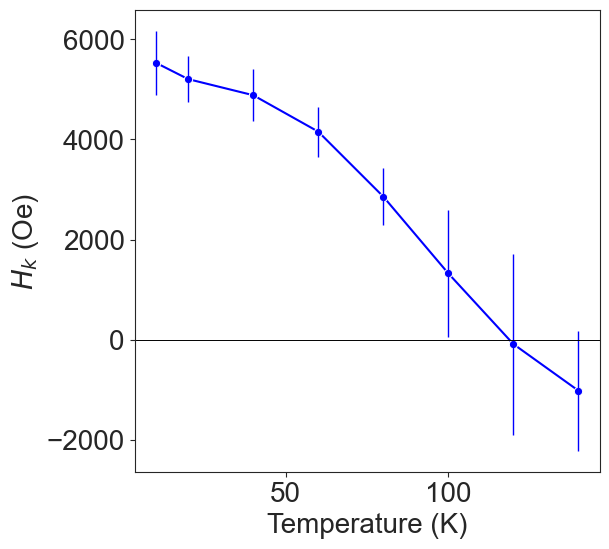

In [108]:
plt.figure(figsize=(6,6))
sns.set_style("ticks")
plt.rcParams['font.size'] = 20

plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel(r'$H_{k}$ (Oe)', fontsize=20)

sns.lineplot(x='T', y='Hk', data=Hk_as_T, marker='o', color='b')
plt.errorbar(x=Hk_as_T['T'], y=Hk_as_T['Hk'], yerr=Hk_as_T['std'], fmt='none', elinewidth=1, color='b')
plt.axhline(y=0.5, color='black', lw=0.7, linestyle='-')
#plt.errorbar(x=t.index, y=t['torque_2'], yerr=t["torque_e"], fmt='none', elinewidth=1, color='blue')

For a test, we repeat the same but not making the OHE correction:

In [109]:
def Hk_finder_rep_2(file):
    # consider way to go and way back:
    DATA, (current, field, temperature) = read_file_info(file)
    data_go, data_back = DATA.loc[len(DATA)//2:], DATA.loc[:len(DATA)//2]
    
    Hk = []
    for data in (data_go, data_back):

        data['AHE'] = data['v1'] # no correction
        data['thetaH'] = data['angle'] - 180.129 # real theta_M

        amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
        offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
        sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
        sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

        # we use directly around theta = 0:

        data['thetaH_abs'] = data['thetaH'].apply(abs)
        minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

        data['AHE_cor'] = data['AHE'] - offset_AHE
        data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
        data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

        sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))
        data_small_angle = data.loc[minimum_index-5:minimum_index+5]

        q, cov = curve_fit(quad, xdata=data_small_angle['thetaH'], ydata=data_small_angle['AHE_rel'])
        
        data_small_angle['AHE_q'] = quad(data_small_angle['thetaH'], q[0], 0, q[2], q[3], q[4])
        try:
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        except:
            # to avoid math error:
            print('Math error, correction done.')
            data_small_angle['AHE_q'] = data_small_angle['AHE_q'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        
        
        # set-up correction:
        data_small_angle['thetaH'] -= q[1] 
        theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)

        
        # y term:
        Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(2 * x*math.pi/180)))
        # x term:
        Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

        lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
        Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]

        Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
        Hk_data.columns=('x', 'y', 'pred')
        # squared error:
        Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
        Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

        # average distance from mean
        Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
        Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()


        # outlier elimination
        threshold = 5
        max_distance = 10
        
        filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]
        
        filtered_df.sort_values('x').reset_index().loc[1:len(filtered_df)-1] # head and tail elimination for ever been data
        lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

        Hk.append(1/lin_par[0])

        plt.scatter(Hk_data['x'], Hk_data['y'], marker = 'o')
        plt.plot(Hk_data['x'], [x*lin_par[0] + lin_par[1] for x in Hk_data['x']])

        plt.xlabel(" $ H_{ext} * sin(\Theta_H-\Theta_M) $ (G)", fontsize=18)
        plt.xticks(fontsize=16)
        plt.ylabel("0.5*sin($\Theta_{M}$)", fontsize=18)
        
#sns.lineplot(x='thetaM', y='AHE_q', data=data_small_angle)
    return Hk

[4663.128151698815, 5852.345231867282]

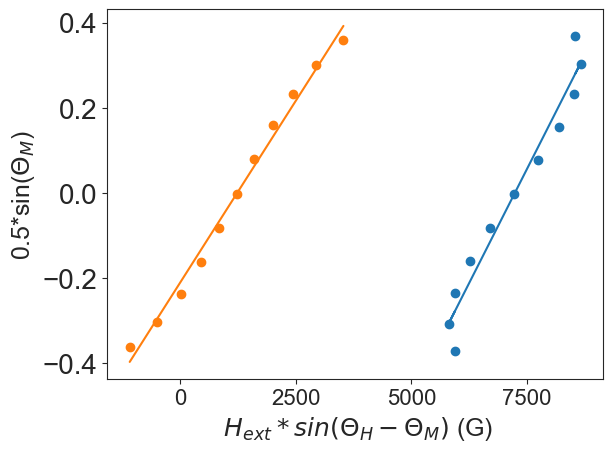

In [110]:
Hk_finder_rep_2(file_list[295])

In [111]:
def Hk_finder_2(file):
    # consider way to go and way back:
    DATA, (current, field, temperature) = read_file_info(file)
    data_go, data_back = DATA.loc[len(DATA)//2:], DATA.loc[:len(DATA)//2]
    
    Hk = []
    for data in (data_go, data_back):

        data['AHE'] = data['v1'] # no correction
        data['thetaH'] = data['angle'] - 180.129 # real theta_M

        amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
        offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
        sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
        sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

        # we use directly around theta = 0:

        data['thetaH_abs'] = data['thetaH'].apply(abs)
        minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

        data['AHE_cor'] = data['AHE'] - offset_AHE
        data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
        data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

        sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))
        data_small_angle = data.loc[minimum_index-5:minimum_index+5]

        q, cov = curve_fit(quad, xdata=data_small_angle['thetaH'], ydata=data_small_angle['AHE_rel'])
        
        data_small_angle['AHE_q'] = quad(data_small_angle['thetaH'], q[0], 0, q[2], q[3], q[4])
        try:
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        except:
            # to avoid math error:
            #print('Math error, correction done.')
            data_small_angle['AHE_q'] = data_small_angle['AHE_q'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))
            data_small_angle['thetaM'] = data_small_angle['AHE_q'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        
        
        # set-up correction:
        data_small_angle['thetaH'] -= q[1] 
        theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)

        
        # y term:
        Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(x*math.pi/180)))
        # x term:
        Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

        lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
        Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]

        Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
        Hk_data.columns=('x', 'y', 'pred')
        # squared error:
        Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
        Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

        # average distance from mean
        Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
        Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()


        # outlier elimination
        threshold = 5
        max_distance = 10
        
        filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]
        
        filtered_df.sort_values('x').reset_index().loc[1:len(filtered_df)-1] # head and tail elimination for ever been data
        lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

        Hk.append(1/lin_par[0])
    return Hk

In [112]:
Hk_vs_T_2 = pd.DataFrame(columns=('T', 'I', 0, 1, 2, 3, 4, 5))

file_info_filtered = file_info[file_info['H'] >= 4e4]
for temperature in file_info_filtered['T'].unique():
    print(temperature)
    # dataframe with the temperature of interest:
    for current in file_info_filtered[file_info_filtered['T'] == temperature]['A'].unique():
        row = [temperature, current]
        # three files of interest:
        three_files = file_info_filtered[(file_info_filtered['T'] == temperature) & (file_info_filtered['A'] == current)]['file']
        for file in three_files:
            Hk_values = Hk_finder_2(file)
            row.append(Hk_values[0]), row.append(Hk_values[1])
            
        Hk_vs_T_2.loc[len(Hk_vs_T_2)] = row

10.0
20.0
40.0
60.0
80.0
100.0
120.0
140.0
180.0
220.0
260.0
300.0


In [113]:
Hk_vs_T_2['Hk'] = Hk_vs_T_2[[0,1,2,3,4,5]].mean(axis=1)
Hk_vs_T_2['std'] = Hk_vs_T_2[[0,1,2,3,4,5]].std(axis=1)

0
1
2
3
4


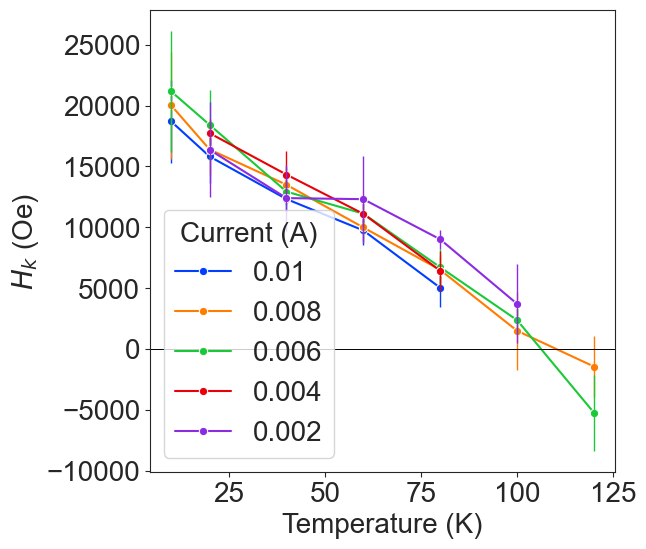

In [114]:
Hk_vs_T_lowT_2 = Hk_vs_T_2[Hk_vs_T_2['T'] < 150]
Hk_vs_T_lowT_2 = Hk_vs_T_lowT_2[Hk_vs_T_lowT_2['std'] < 5000]

plt.figure(figsize=(6,6))
sns.set_style("ticks")
plt.rcParams['font.size'] = 20

plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel(r'$H_{k}$ (Oe)', fontsize=20)

for j, I in enumerate(Hk_vs_T_lowT_2['I'].unique()):
    df_I = Hk_vs_T_lowT_2[Hk_vs_T_lowT_2['I'] == I]
    sns.lineplot(x='T', y='Hk', data=df_I, marker='o', color=sns.color_palette('bright', 15).as_hex()[j], label=I)
    plt.errorbar(x=df_I['T'], y=df_I['Hk'], yerr=df_I['std'], fmt='none', elinewidth=1, color=sns.color_palette('bright', 15).as_hex()[j])
    print(j)
plt.axhline(y=0.5, color='black', lw=0.7, linestyle='-')
plt.legend(title='Current (A)')
    
#plt.legend(title='Current (A)')
#plt.errorbar(x=t.index, y=t['torque_2'], yerr=t["torque_e"], fmt='none', elinewidth=1, color='blue')

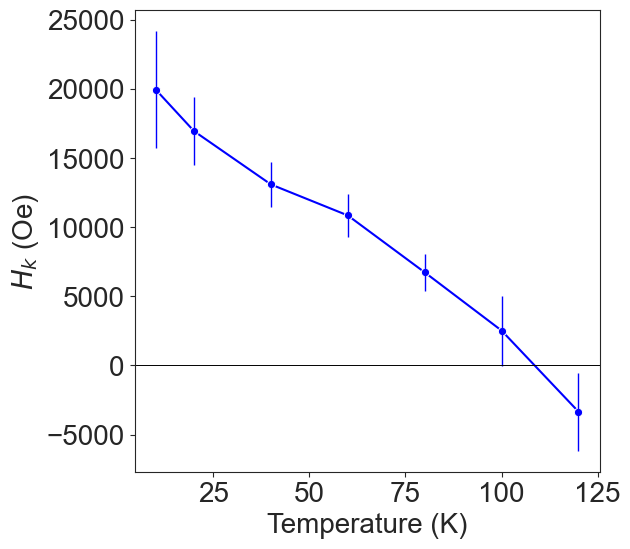

In [115]:
Hk_as_T_2 = pd.DataFrame(columns=('T', 'Hk', 'std'))

for T in Hk_vs_T_lowT_2['T'].unique():
    df_T = Hk_vs_T_lowT_2[Hk_vs_T_lowT_2['T'] == T]
    Hk_as_T_2.loc[len(Hk_as_T_2)] = (T, df_T['Hk'].mean(), df_T['std'].mean())

plt.figure(figsize=(6,6))
sns.set_style("ticks")
plt.rcParams['font.size'] = 20

plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel(r'$H_{k}$ (Oe)', fontsize=20)

sns.lineplot(x='T', y='Hk', data=Hk_as_T_2, marker='o', color='b')
plt.errorbar(x=Hk_as_T_2['T'], y=Hk_as_T_2['Hk'], yerr=Hk_as_T_2['std'], fmt='none', elinewidth=1, color='b')
plt.axhline(y=0.5, color='black', lw=0.7, linestyle='-')
#plt.errorbar(x=t.index, y=t['torque_2'], yerr=t["torque_e"], fmt='none', elinewidth=1, color='blue')

0
1
2
3
4


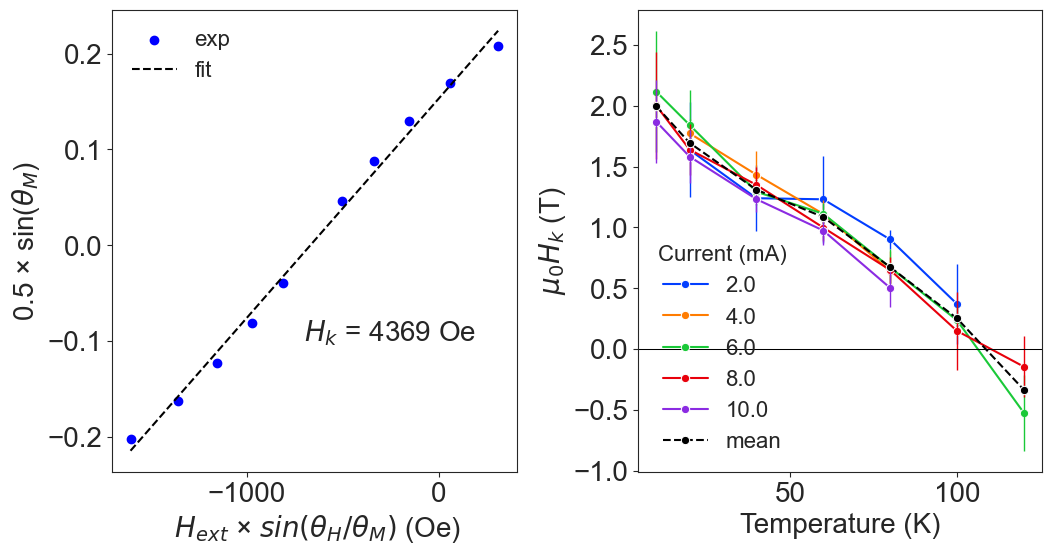

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.rcParams['font.size'] = 20
sns.set_style("ticks")

axs = axes[0]
# plot 1
threshold = 5
max_distance = 5
filtered_df = rep
lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

Hk = 1/lin_par[0]
axs.text(-700,-0.1,f"$H_{'k'}$ = {int(Hk)} Oe")

axs.scatter(filtered_df['x'], filtered_df['y'], marker = 'o', color='b', label='exp')
axs.plot(filtered_df['x'], [x*lin_par[0] + lin_par[1] for x in filtered_df['x']], color='black', ls='--', label='fit')
axs.legend(frameon=False, fontsize=16)


axs.set_xlabel(" $ H_{ext}$ × $sin(θ_H/θ_M) $ (Oe)")
axs.set_ylabel("0.5 × sin($θ_{M}$)")


axs=axes[1]
Hk_as_T_2['Hk_4'] = Hk_as_T_2['Hk']*1e-4
Hk_vs_T_lowT_2['Hk_4'] = Hk_vs_T_lowT_2['Hk']*1e-4
Hk_vs_T_lowT_2['std_4'] = Hk_vs_T_lowT_2['std']*1e-4

for j, I in enumerate(Hk_vs_T_2.sort_values('I')['I'].unique()):
    df_I = Hk_vs_T_lowT_2[Hk_vs_T_lowT_2['I'] == I]
    sns.lineplot(x='T', y='Hk_4', data=df_I, marker='o', color=sns.color_palette('bright', 15).as_hex()[j], label=I*1000, ax=axs)
    axs.errorbar(x=df_I['T'], y=df_I['Hk_4'], yerr=df_I['std_4'], fmt='none', elinewidth=1, color=sns.color_palette('bright', 15).as_hex()[j])
    print(j)
sns.lineplot(x='T', y='Hk_4', data=Hk_as_T_2, marker='o', color='black', ls='--', ax=axs, label='mean')
axs.legend(frameon=False, title='Current (mA)', fontsize=16, title_fontsize=16)
axs.axhline(0, color='black', lw=0.75)

axs.set_xlabel('Temperature (K)')
axs.set_ylabel('$μ_{0}H_{k}$ (T)')

plt.savefig('Hk_thesis.png', dpi = 1000, bbox_inches = 'tight')

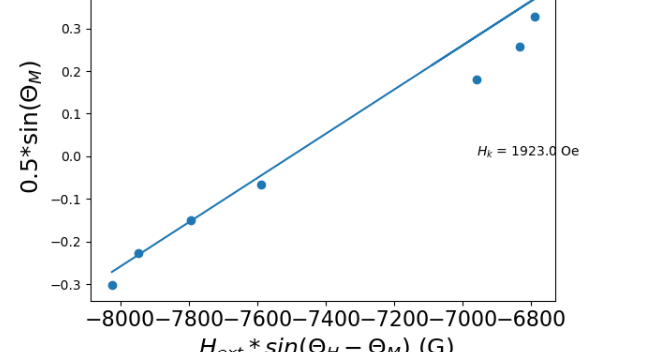

In [117]:
os.getcwd()

'C:\\Users\\apeco\\OneDrive\\Escritorio\\PhD\\Results\\Dynacool\\transfer_4037621_files_0478b8af\\Second run - 6'

Third trial, no quadratic correction - it gives bad values:

In [118]:
def Hk_finder_3(file):
    # consider way to go and way back:
    DATA, (current, field, temperature) = read_file_info(file)
    data_go, data_back = DATA.loc[len(DATA)//2:], DATA.loc[:len(DATA)//2]
    
    Hk = []
    for data in (data_go, data_back):

        data['AHE'] = data['v1']
        data['thetaH'] = data['angle'] - 180.129 # real theta_M

        amp_AHE = (data['AHE'].max() - data['AHE'].min())/2 # amplitude of AHE
        offset_AHE = (data['AHE'].max() + data['AHE'].min())/2 # offset for AHE
        sign_AHE = AHE_amplitude(data, current, field, temperature)/amp_AHE
        sign_AHE = 1 if abs(sign_AHE - 1) < abs(sign_AHE + 1) else -1

        # we use directly around theta = 0:

        data['thetaH_abs'] = data['thetaH'].apply(abs)
        minimum_index = data[data['thetaH_abs'] == data['thetaH_abs'].min()].index[0]

        data['AHE_cor'] = data['AHE'] - offset_AHE
        data['AHE_rel'] = data['AHE_cor']/(sign_AHE*amp_AHE)
        data['AHE_rel'] = data['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))

        sign_theta_H = data['thetaH'].apply(lambda x: x/abs(x))
        data_small_angle = data.loc[minimum_index-5:minimum_index+5]

        try:
            data_small_angle['thetaM'] = data_small_angle['AHE_rel'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        except:
            # to avoid math error:
            print('Math error, correction done.')
            data_small_angle['AHE_rel'] = data_small_angle['AHE_rel'].apply(lambda x: x if abs(x) <= 1 else x/abs(x))
            data_small_angle['thetaM'] = data_small_angle['AHE_rel'].apply(lambda x:  math.acos(x)/math.pi*180)*sign_theta_H
        
        
        # set-up correction:
        data_small_angle['thetaH'] -= q[1] 
        theta_H_fic = np.linspace(data_small_angle['thetaH'].min(), data_small_angle['thetaH'].max(), 20)

        
        # y term:
        Hk_y = list(data_small_angle['thetaM'].apply(lambda x: 0.5 * math.sin(x*math.pi/180)))
        # x term:
        Hk_x = list(field * np.sin((data_small_angle['thetaH'] - data_small_angle['thetaM'])*np.pi/180))

        lin_par, cov = curve_fit(lin_fit, xdata=Hk_x, ydata=Hk_y)
        Hk_predicted = [x*lin_par[0] + lin_par[1] for x in Hk_x]

        Hk_data = pd.concat((pd.Series(Hk_x), pd.Series(Hk_y), pd.Series(Hk_predicted)), axis=1)
        Hk_data.columns=('x', 'y', 'pred')
        # squared error:
        Hk_data['MSE'] = (Hk_data['y'] - Hk_data['pred']).apply(lambda x: x**2)
        Hk_data['mse'] = (Hk_data['MSE'] - Hk_data['MSE'].median())/Hk_data['MSE'].median()

        # average distance from mean
        Hk_data['distance'] = (Hk_data['x'] - Hk_data['x'].median()).apply(lambda x: x**2)
        Hk_data['distance'] = Hk_data['distance']/Hk_data['distance'].median()


        # outlier elimination
        threshold = 5
        max_distance = 10
        
        filtered_df = Hk_data[(Hk_data['mse'] <= threshold) & (Hk_data['mse'] >= -threshold) & (Hk_data['distance'] <= max_distance)]
        
        filtered_df.sort_values('x').reset_index().loc[1:len(filtered_df)-1] # head and tail elimination for ever been data
        lin_par, cov = curve_fit(lin_fit, xdata=filtered_df['x'], ydata=filtered_df['y'])

        Hk.append(1/lin_par[0])
    return Hk

In [119]:
Hk_vs_T_3 = pd.DataFrame(columns=('T', 'I', 0, 1, 2, 3, 4, 5))

file_info_filtered = file_info[file_info['H'] >= 4e4]
for temperature in file_info_filtered['T'].unique():
    print(temperature)
    # dataframe with the temperature of interest:
    for current in file_info_filtered[file_info_filtered['T'] == temperature]['A'].unique():
        row = [temperature, current]
        # three files of interest:
        three_files = file_info_filtered[(file_info_filtered['T'] == temperature) & (file_info_filtered['A'] == current)]['file']
        for file in three_files:
            Hk_values = Hk_finder_3(file)
            row.append(Hk_values[0]), row.append(Hk_values[1])
            
        Hk_vs_T_3.loc[len(Hk_vs_T_3)] = row
        
Hk_vs_T_3['Hk'] = Hk_vs_T_3[[0,1,2,3,4,5]].mean(axis=1)
Hk_vs_T_3['std'] = Hk_vs_T_3[[0,1,2,3,4,5]].std(axis=1)

10.0
20.0
40.0
60.0
80.0
100.0
120.0
140.0
180.0
220.0
260.0
300.0


0
1
2
3
4


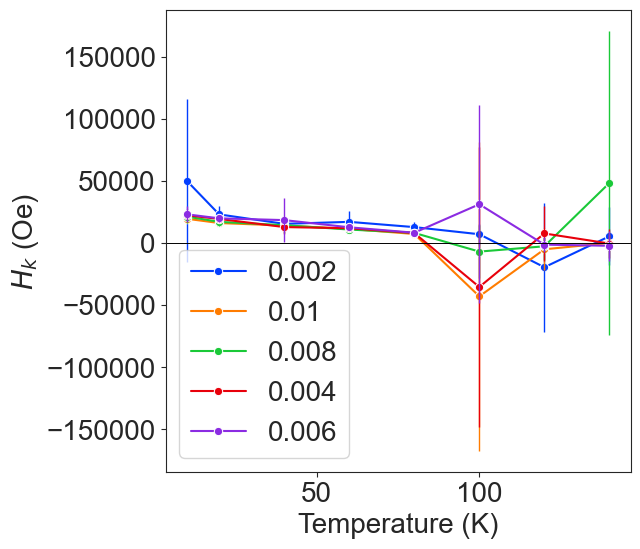

In [120]:
Hk_vs_T_lowT_3 = Hk_vs_T_3[Hk_vs_T_3['T'] < 150]
#Hk_vs_T_lowT_3 = Hk_vs_T_lowT_3[Hk_vs_T_lowT_3['std'] < 5000]

plt.figure(figsize=(6,6))
sns.set_style("ticks")
plt.rcParams['font.size'] = 20

plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel(r'$H_{k}$ (Oe)', fontsize=20)

for j, I in enumerate(Hk_vs_T_lowT_3['I'].unique()):
    df_I = Hk_vs_T_lowT_3[Hk_vs_T_lowT_3['I'] == I]
    sns.lineplot(x='T', y='Hk', data=df_I, marker='o', color=sns.color_palette('bright', 15).as_hex()[j], label=I)
    plt.errorbar(x=df_I['T'], y=df_I['Hk'], yerr=df_I['std'], fmt='none', elinewidth=1, color=sns.color_palette('bright', 15).as_hex()[j])
    print(j)
plt.axhline(y=0.5, color='black', lw=0.7, linestyle='-')
    
#plt.legend(title='Current (A)')
#plt.errorbar(x=t.index, y=t['torque_2'], yerr=t["torque_e"], fmt='none', elinewidth=1, color='blue')

No errors:

0
1
2
3
4


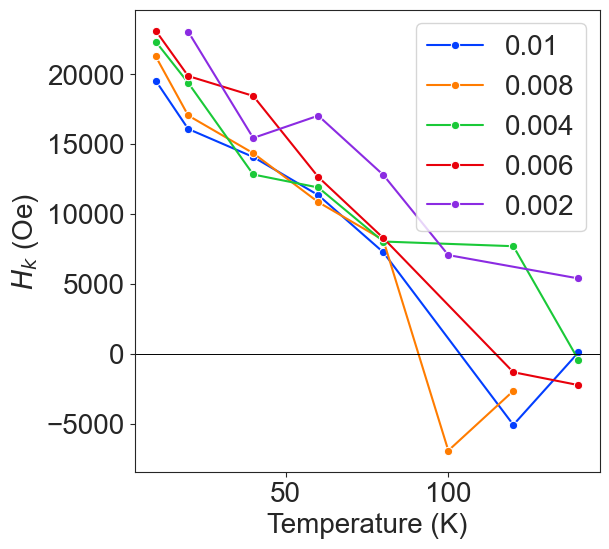

In [121]:
Hk_vs_T_lowT_3 = Hk_vs_T_3[Hk_vs_T_3['T'] < 150]
Hk_vs_T_lowT_3 = Hk_vs_T_lowT_3[Hk_vs_T_lowT_3['std'] < 30000]

plt.figure(figsize=(6,6))
sns.set_style("ticks")
plt.rcParams['font.size'] = 20

plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel(r'$H_{k}$ (Oe)', fontsize=20)

for j, I in enumerate(Hk_vs_T_lowT_3['I'].unique()):
    df_I = Hk_vs_T_lowT_3[Hk_vs_T_lowT_3['I'] == I]
    sns.lineplot(x='T', y='Hk', data=df_I, marker='o', color=sns.color_palette('bright', 15).as_hex()[j], label=I)
    print(j)
plt.axhline(y=0.5, color='black', lw=0.7, linestyle='-')
    
#plt.legend(title='Current (A)')
#plt.errorbar(x=t.index, y=t['torque_2'], yerr=t["torque_e"], fmt='none', elinewidth=1, color='blue')

The quadratic correction does not change much the values, but it smooths them a lot.